https://towardsdatascience.com/implementing-math-in-deep-learning-papers-into-efficient-pytorch-code-simclr-contrastive-loss-be94e1f63473

Step 1: Understanding the math and explaining it in simple terms
Step 2: Implementing it using simple Python code, with naive “for” loops!
Step 3: Converting it into efficient matrix-friendly PyTorch code


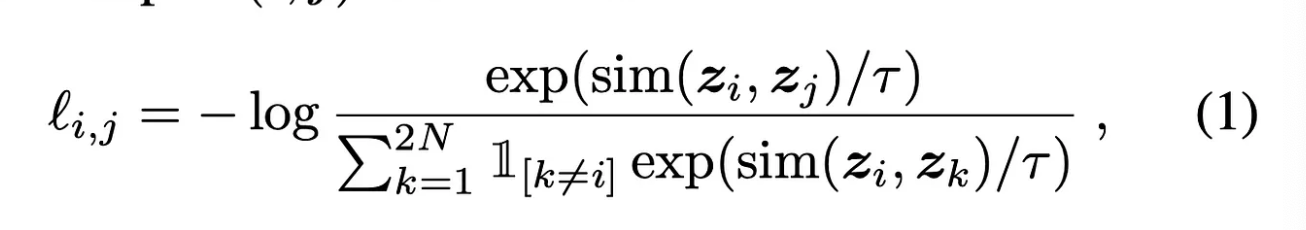

In [1]:
import torch
import torch.nn.functional as F

batch_1 = torch.tensor([[0.5, 0.1, -0.9],
                        [-0.1, 0.2, -0.5]])

# giving arbitrary class indexes to the A1 and B1 images
labels_1 = torch.tensor([0, 1])

batch_2 = torch.tensor([[0.2, 0.15, -0.8],
                        [-0.5, 0.3, -0.01]])

# giving the same arbitrary class indexes to the A2 and B2 images
labels_2 = torch.tensor([0, 1])
temperature = 0.05

projections = torch.cat([batch_1, batch_2], dim=0) # (B, D)
labels = torch.cat([labels_1, labels_2], dim=0)

projections = F.normalize(projections, dim=-1)

sim_matrix = projections @ projections.T / temperature # (B x B)
sim_matrix = torch.exp(sim_matrix)

# creating a mask for the positive pairs in our similarity matrix
mask = torch.eq(labels.unsqueeze(1), labels.unsqueeze(0))
mask = mask.float() - torch.eye(labels.shape[0])

numerator = (sim_matrix * mask).sum(dim=-1)
denominator = sim_matrix.sum(dim=-1) - sim_matrix.diag()
loss = -torch.log(numerator / denominator)

print(loss.mean())

tensor(2.7359)


In [13]:
numerator.shape

torch.Size([4])

In [14]:
denominator.shape

torch.Size([4])

In [8]:
labels.shape

torch.Size([4])

In [9]:
print(labels.unsqueeze(-1).shape)
labels.unsqueeze(-1)

torch.Size([4, 1])


tensor([[0],
        [1],
        [0],
        [1]])

In [10]:
print(labels.unsqueeze(0).shape)
labels.unsqueeze(0)

torch.Size([1, 4])


tensor([[0, 1, 0, 1]])

In [12]:
mask

tensor([[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]])